* NAME: RISHABH PATIL
* SAP: 60009200056
* BATCH: K2

In [ ]:
import pandas as pd
import numpy as np

# Question 1

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
x, y = make_classification(n_features=20, n_samples=1000, n_informative=15, n_redundant=5, random_state=6)

In [ ]:
x, y

(array([[-3.47224758,  1.95378146,  0.04875169, ...,  2.07283886,
          0.08385173,  0.91461126],
        [-2.42264447,  1.49687583, -0.80110683, ...,  1.14726175,
         -2.86306705, -0.27575018],
        [-4.01744369, -2.26537329,  2.72577799, ...,  1.34014025,
         -0.78634498, -1.17749558],
        ...,
        [ 2.39019744, -0.28042398, -0.01286339, ..., -0.95516099,
         -0.76710459,  1.70412285],
        [ 0.60081099,  1.84539674, -1.58163928, ..., -1.55912569,
         -2.26992832,  0.42082267],
        [-1.27669747,  1.6527396 , -1.39187956, ...,  0.72869505,
         -0.49441791,  2.75397458]]),
 array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
   

In [ ]:
# xtrain = x[:20]

In [ ]:
# ytest = y[:20]

## AdaBoost using DT

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=1, error_score='raise')
print(f'Accuracy: {np.mean(n_scores)}, STD of all accuracies: {np.std(n_scores)}')

Accuracy: 0.8063333333333333, STD of all accuracies: 0.040700805342837564


In [ ]:
model.fit(x, y)
row = [[-3.47224758,   1.95378146,   0.04875169,  -0.91592588,
        -3.54022468,   1.96405547,  -7.72564954,  -2.64787168,
        -1.81726906,  -1.67104974,   2.33762043,  -4.30273117,
         0.4839841 ,  -1.28253034, -10.6704077 ,  -0.7641103 ,
        -3.58493721,   2.07283886,   0.08385173,   0.91461126]]
yhat = model.predict(row)
print(yhat)

[0]


## AdaBoost using Logistic Regression

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
model1 = AdaBoostClassifier(base_estimator = LogisticRegression())

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model1, x, y, scoring='accuracy', cv=cv, n_jobs=1, error_score='raise')
print(f'Accuracy: {np.mean(n_scores)}, STD of all accuracies: {np.std(n_scores)}')

Accuracy: 0.7939999999999999, STD of all accuracies: 0.03168595903550971


In [ ]:
model1.fit(x, y)
row = [[-3.47224758,   1.95378146,   0.04875169,  -0.91592588,
        -3.54022468,   1.96405547,  -7.72564954,  -2.64787168,
        -1.81726906,  -1.67104974,   2.33762043,  -4.30273117,
         0.4839841 ,  -1.28253034, -10.6704077 ,  -0.7641103 ,
        -3.58493721,   2.07283886,   0.08385173,   0.91461126]]
yhat = model1.predict(row)
print(yhat)

[0]


## AdaBoost ensemble depth effect on performance

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# Set a list of models to evaluate
def get_models():
  models = {}
  # explore depths from 1 - 10
  for i in range(1,10):
    # define base model
    base = DecisionTreeClassifier(max_depth=i)
    # define ensemble model
    models[str(i)] = AdaBoostClassifier(base_estimator=base)
  return models

In [ ]:
# evaluate model using cross_validation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

def evaluate(model, x, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=1, error_score='raise')
  return [np.mean(n_scores), np.std(n_scores)]
  # return n_scores

models = get_models()

results, names = [], []

#evaluating models
for name, model in models.items():
  scores = evaluate(model, x, y)
  results.append(scores)
  names.append(name)
  print(f'Name: {name}  Acc: {scores[0]:.16f}  STD: {scores[1]:.16f}')



Name: 1  Acc: 0.8063333333333333  STD: 0.0407008053428376
Name: 2  Acc: 0.8639999999999998  STD: 0.0275196899207337
Name: 3  Acc: 0.8663333333333333  STD: 0.0315682681747915
Name: 4  Acc: 0.8966666666666665  STD: 0.0283235277149973
Name: 5  Acc: 0.9190000000000002  STD: 0.0259935889531759
Name: 6  Acc: 0.9266666666666666  STD: 0.0216538423585489
Name: 7  Acc: 0.9273333333333335  STD: 0.0268245327183076
Name: 8  Acc: 0.9303333333333336  STD: 0.0262657360241225
Name: 9  Acc: 0.9356666666666666  STD: 0.0295164737430172


We can see that there is slight change in metrics with Decision Tree and Logistic Regession as base learner

# Question 2

In [ ]:
data = pd.read_csv('/creditcard 1.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

There is class imbalance in the dataset given to us as we can there are 65283 '0.0' values
but only 169 '1.0' values

In [ ]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values.reshape(-1,1)

In [ ]:
t = [(d) for d in y if d==0]
s = [(d) for d in y if d==1]
print('Before Over-Sampling: ')
print('Samples in class 0: ',len(t))
print('Samples in class 1: ',len(s))

Before Over-Sampling: 
Samples in class 0:  284315
Samples in class 1:  492


In [ ]:
x, y

(array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
          1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
        [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
         -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
        [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
         -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
        ...,
        [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
          4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
        [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
          1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
        [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
         -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]]), array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]))

In [ ]:
from imblearn.over_sampling import RandomOverSampler
Over = RandomOverSampler()
x_Over, y_Over = Over.fit_resample(x, y)

t = [(d) for d in y_Over if d==0]
s = [(d) for d in y_Over if d==1]
print('After Over-Sampling: ')
print('Samples in class 0: ',len(t))
print('Samples in class 1: ',len(s))

After Over-Sampling: 
Samples in class 0:  284315
Samples in class 1:  284315


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x,y)
scores = evaluate(dt,x_Over,y_Over)
print(f'Accuracy: {np.mean(scores)}, STD of all accuracies: {np.std(scores)}')

Accuracy: 0.49992191494855764, STD of all accuracies: 0.4998647066976212


In [ ]:
model_ada = AdaBoostClassifier()
model_ada.fit(x,y)
scores = evaluate(model_ada,x_Over,y_Over)
print(f'Accuracy: {np.mean(scores)}, STD of all accuracies: {np.std(scores)}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.4849726345554646, STD of all accuracies: 0.482659510541816


# Question 3

## AdaBoost ensemble on Depth Effect On Performance

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# Set a list of models to evaluate
def get_models():
  models = {}
  # explore depths from 1 - 10
  for i in range(1,10):
    # define base model
    base = DecisionTreeClassifier(max_depth=i)
    # define ensemble model
    models[str(i)] = AdaBoostClassifier(base_estimator=base)
  return models

In [ ]:
# evaluate model using cross_validation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

def evaluate(model, x, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=1, error_score='raise')
  return [np.mean(n_scores), np.std(n_scores)]
  # return n_scores

models = get_models()

results, names = [], []

#evaluating models
for name, model in models.items():
  scores = evaluate(model, x_Over, y_Over)
  results.append(scores)
  names.append(name)
  print(f'Name: {name}  Acc: {scores[0]:.16f}  STD: {scores[1]:.16f}')

Name: 1  Acc: 1.0000000000000000  STD: 0.0000000000000000
Name: 2  Acc: 1.0000000000000000  STD: 0.0000000000000000
Name: 3  Acc: 1.0000000000000000  STD: 0.0000000000000000
Name: 4  Acc: 0.9998045784477944  STD: 0.0003542316454620
Name: 5  Acc: 0.9996929089893913  STD: 0.0004578788237537
Name: 6  Acc: 0.9997766610831936  STD: 0.0004288746927900
Name: 7  Acc: 0.9998045784477945  STD: 0.0004150214613992
Name: 8  Acc: 0.9997766610831937  STD: 0.0004288746927900
Name: 9  Acc: 0.9998045784477944  STD: 0.0003542316454620


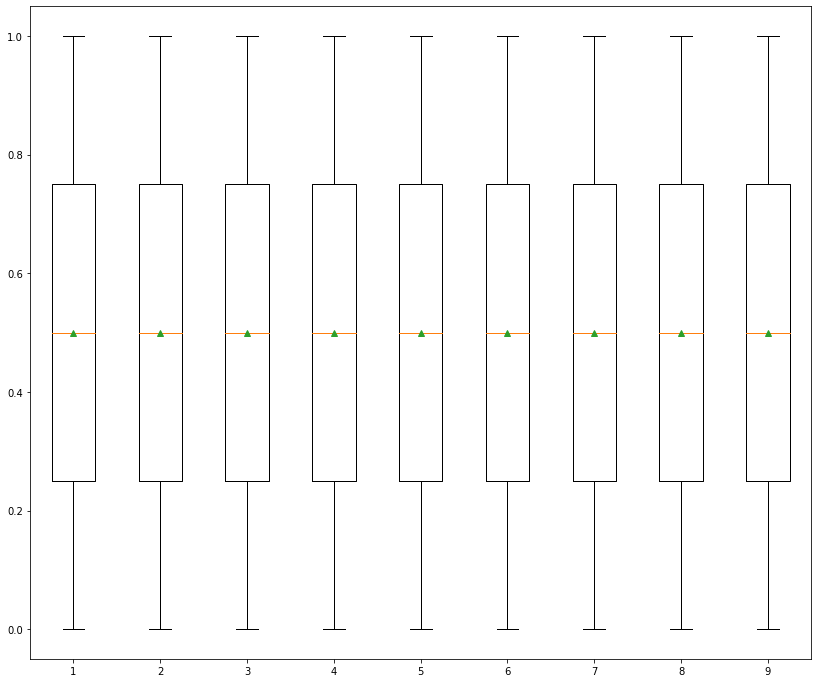

In [ ]:
plt.figure(figsize=(14,12))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## ADA Boost ensemble learning rate on Perormance

In [ ]:
def get_models_lr():
  models = {}
  # explore depths from 0.1 - 2.1
  for i in np.arange(0.1,2.1,0.1):
    # define base model
    key = '%3f'%i
    # define ensemble model
    models[key] = AdaBoostClassifier(learning_rate=i)
  return models

In [ ]:
models = get_models_lr()

results, names = [], []

#evaluating models
for name, model in models.items():
  scores = evaluate(model, x_Over, y_Over)
  results.append(scores)
  names.append(name)
  print(f'Name: {name}  Acc: {scores[0]:.16f}  STD: {scores[1]:.16f}')

Name: 0.100000  Acc: 0.9959933703782617  STD: 0.0009224391344081
Name: 0.200000  Acc: 0.9974173713939490  STD: 0.0007506785199739
Name: 0.300000  Acc: 0.9979157758976669  STD: 0.0006982341325385
Name: 0.400000  Acc: 0.9983623916668395  STD: 0.0006296156455777
Name: 0.500000  Acc: 0.9986666188991988  STD: 0.0006052599731034
Name: 0.600000  Acc: 0.9990485084922386  STD: 0.0003990686575834
Name: 0.700000  Acc: 0.9993786156359264  STD: 0.0003831556496386
Name: 0.800000  Acc: 0.9994692368078509  STD: 0.0003128452778720
Name: 0.900000  Acc: 0.9996504753805842  STD: 0.0003225930864181
Name: 1.000000  Acc: 0.9997346202894835  STD: 0.0002155489749261
Name: 1.100000  Acc: 0.9996698890851963  STD: 0.0002842917529439
Name: 1.200000  Acc: 0.9997216690204714  STD: 0.0002491086126143
Name: 1.300000  Acc: 0.9997863964536428  STD: 0.0002027425807952
Name: 1.400000  Acc: 0.9997152002996780  STD: 0.0002227317523988
Name: 1.500000  Acc: 0.9997475615021862  STD: 0.0002076333723833
Name: 1.600000  Acc: 0.99

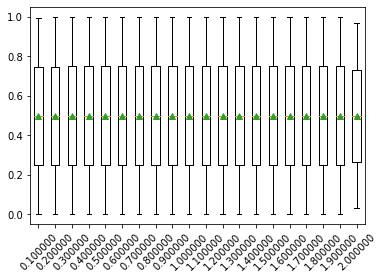

In [ ]:
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

## Ada Boost using Grid Search

In [ ]:
def evaluate_grid(model, x, y, grid):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = GridSearchCV(model, x, y,grid, scoring='accuracy', cv=cv, n_jobs=1)
  return [np.mean(n_scores), np.std(n_scores)]
  # return n_scores

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
model = AdaBoostClassifier()
grid = {}
grid['n_estimators'] = [20, 50, 70, 100]
grid['learning_rate'] = [0.0001,0.001,0.01,0.1,1]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(x_Over, y_Over)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    # print("%f (%f) with: %r" % (mean, stdev, param))
    print(f"{mean:.4f} {stdev:.4f} {param}")

Best: 1.000000 using {'learning_rate': 0.1, 'n_estimators': 20}
0.9847 0.0035 {'learning_rate': 0.0001, 'n_estimators': 20}
0.9847 0.0035 {'learning_rate': 0.0001, 'n_estimators': 50}
0.9847 0.0035 {'learning_rate': 0.0001, 'n_estimators': 70}
0.9847 0.0035 {'learning_rate': 0.0001, 'n_estimators': 100}
0.9847 0.0035 {'learning_rate': 0.001, 'n_estimators': 20}
0.9853 0.0046 {'learning_rate': 0.001, 'n_estimators': 50}
0.9997 0.0005 {'learning_rate': 0.001, 'n_estimators': 70}
0.9997 0.0005 {'learning_rate': 0.001, 'n_estimators': 100}
0.9997 0.0005 {'learning_rate': 0.01, 'n_estimators': 20}
0.9999 0.0003 {'learning_rate': 0.01, 'n_estimators': 50}
0.9999 0.0003 {'learning_rate': 0.01, 'n_estimators': 70}
0.9999 0.0003 {'learning_rate': 0.01, 'n_estimators': 100}
1.0000 0.0000 {'learning_rate': 0.1, 'n_estimators': 20}
1.0000 0.0000 {'learning_rate': 0.1, 'n_estimators': 50}
1.0000 0.0000 {'learning_rate': 0.1, 'n_estimators': 70}
1.0000 0.0000 {'learning_rate': 0.1, 'n_estimators': 1